source https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

# Regression loss function

In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import  matplotlib.pyplot as plt

In [2]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

**mean squared error loss**

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-11-05 10:35:50.506894: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Train: 0.000, Test: 0.001


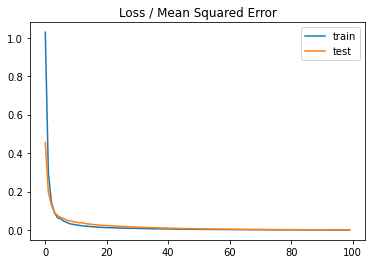

In [4]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
fig, ax = plt.subplots()
ax.set_title('Loss / Mean Squared Error')
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.legend()
plt.show()

There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.

Instead, you can first calculate the natural logarithm of each of the predicted values, then calculate the mean squared error. This is called the **Mean Squared Logarithmic Error loss**, or MSLE for short.

It has the effect of **relaxing the punishing effect of large differences in large predicted values**.

Train: 0.069, Test: 0.101


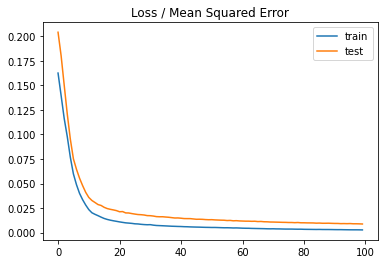

In [8]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
fig, ax = plt.subplots()
ax.set_title('Loss / Mean Squared Error')
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.legend()
plt.show()

On some regression problems, the distribution of the target variable may be **mostly Gaussian, but may have outliers**, e.g. large or small values far from the mean value.

The **Mean Absolute Error**, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.

Train: 0.008, Test: 0.008


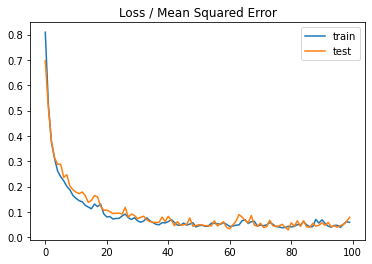

In [9]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
fig, ax = plt.subplots()
ax.set_title('Loss / Mean Squared Error')
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.legend()
plt.show()

# Binary Classification Loss Functions

**Cross-entropy** is the default loss function to use for binary classification problems.

It is intended for use with binary classification where the target values are in the set {0, 1}.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

The function requires that the output layer is configured with a single node and a ‘sigmoid‘ activation in order to predict the probability for class 1

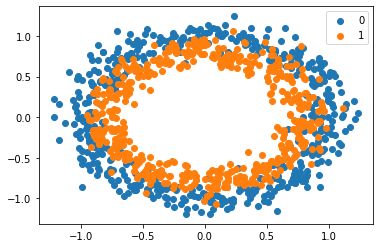

In [1]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
fig, ax = plt.subplots()
for i in range(2):
    samples_ix = np.where(y == i)
    ax.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
ax.legend()
plt.show()

In [2]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

NameError: name 'Sequential' is not defined

Train: 0.842, Test: 0.850


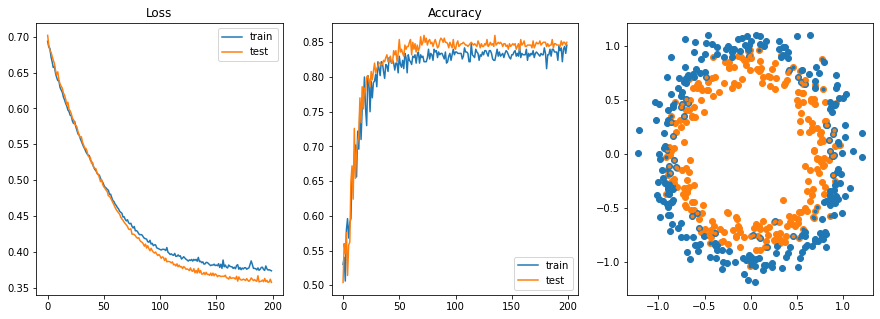

In [30]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
test_pred = model.predict(testX)

fig, ax = plt.subplots(1, 3, figsize=(3*5,5))
# plot loss during training
ax[0].set_title('Loss')
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend()
# plot accuracy during training
ax[1].set_title('Accuracy')
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend()
# plot prediction
pos = testy==1
ax[2].plot(testX[pos,0], testX[pos,1], color="C1", linestyle="", marker="o")
ax[2].plot(testX[~pos,0], testX[~pos,1], color="C0", linestyle="", marker="o")
pos = test_pred[:, 0]>0.5
ax[2].plot(testX[pos,0], testX[pos,1], color="C1", linestyle="", marker=".")
ax[2].plot(testX[~pos,0], testX[~pos,1], color="C0", linestyle="", marker=".")
plt.show()

**hinge loss**

Alternative to cross-entropy for binary classification problems, primarily developed for use with Support Vector Machine (SVM) models.

It is intended for use with binary classification where the target values are in the set {-1, 1}.

The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values.

Reports of performance with the hinge loss are mixed, sometimes resulting in better performance than cross-entropy on binary classification problems.

In [23]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[np.where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
test_pred = model.predict(testX)

Train: 0.420, Test: 0.408


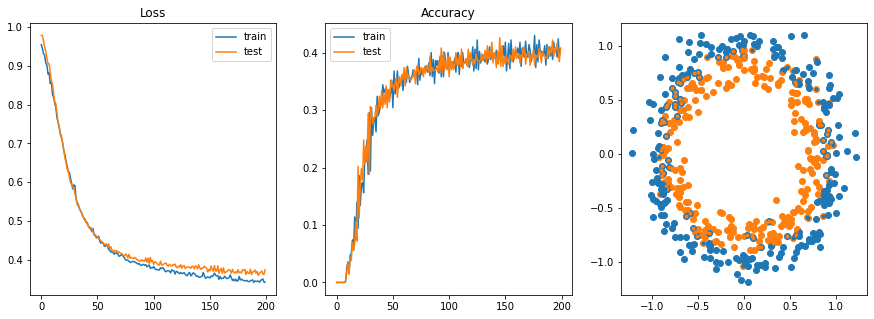

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(3*5,5))
# plot loss during training
ax[0].set_title('Loss')
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend()
# plot accuracy during training
ax[1].set_title('Accuracy')
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend()
# plot prediction
pos = testy==1
ax[2].plot(testX[pos,0], testX[pos,1], color="C1", linestyle="", marker="o")
ax[2].plot(testX[~pos,0], testX[~pos,1], color="C0", linestyle="", marker="o")
pos = test_pred[:, 0]>0
ax[2].plot(testX[pos,0], testX[pos,1], color="C1", linestyle="", marker=".")
ax[2].plot(testX[~pos,0], testX[~pos,1], color="C0", linestyle="", marker=".")
plt.show()

**Squared hinge loss**

It has the effect of smoothing the surface of the error function and making it numerically easier to work with.

In [9]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
test_pred = model.predict(testX)

Train: 0.294, Test: 0.294


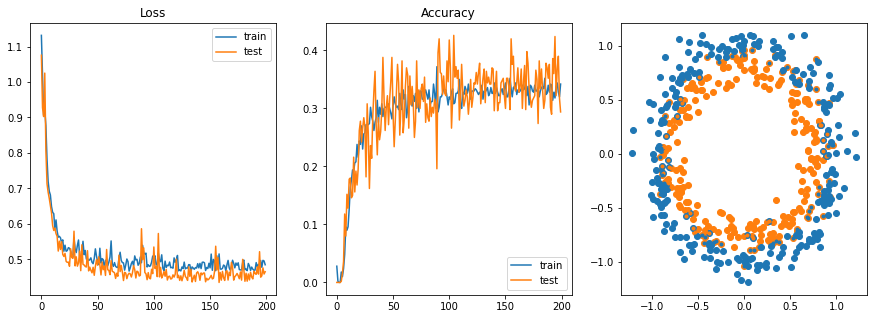

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(3*5,5))
# plot loss during training
ax[0].set_title('Loss')
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend()
# plot accuracy during training
ax[1].set_title('Accuracy')
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend()
# plot prediction
pos = testy==1
ax[2].plot(testX[pos,0], testX[pos,1], color="C1", linestyle="", marker="o")
ax[2].plot(testX[~pos,0], testX[~pos,1], color="C0", linestyle="", marker="o")
pos = test_pred[:, 0]>0
ax[2].plot(testX[pos,0], testX[pos,1], color="C1", linestyle="", marker=".")
ax[2].plot(testX[~pos,0], testX[~pos,1], color="C0", linestyle="", marker=".")
plt.show()

# Multi-Class Classification Loss Functions

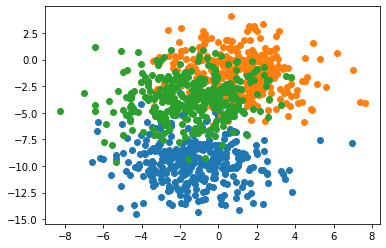

In [44]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from numpy import where
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
fig, ax = plt.subplots()
for i in range(3):
    samples_ix = np.where(y == i)
    ax.scatter(X[samples_ix, 0], X[samples_ix, 1])
plt.show()

**Cross entropy**

`categorical_crossentropy`

requires one hot encoding and `softmax` as output activation

In [49]:
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.818


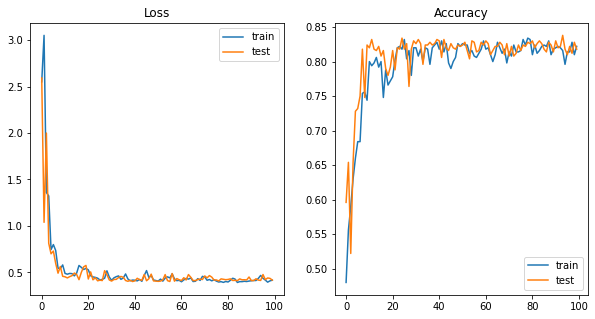

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(2*5,5))
# plot loss during training
ax[0].set_title('Loss')
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].legend()
# plot accuracy during training
ax[1].set_title('Accuracy')
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='test')
ax[1].legend()
plt.show()

**Sparse cross-entropy**

no need for one-hot encoding, `sparse_categorical_crossentropy`

In [51]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.824, Test: 0.826


**Kullback Leibler Divergence Loss**

is a measure of how one probability distribution differs from a baseline distribution.

**A KL divergence loss of 0 suggests the distributions are identical**. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an **autoencoder** used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. Nevertheless, it can be used for multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy.

In [52]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.812, Test: 0.832
